In [25]:
import pandas as pd
Flight_price=pd.read_csv("/content/drive/MyDrive/Airlines prices prediction/Clean_Dataset.csv")
Flight_price.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
Flight_price.corr()

<ipython-input-26-3f47f7e919f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Flight_price.corr()


,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


In [27]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [28]:
Flight_price=Flight_price.drop(['Unnamed: 0','flight'],axis=1)
Flight_price

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [29]:
Flight_price.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

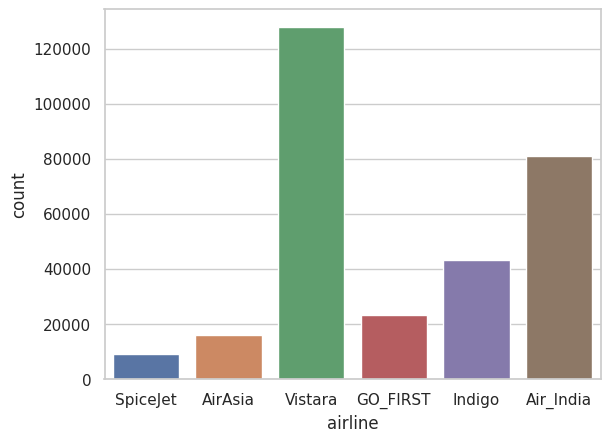

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(x='airline', data=Flight_price)
plt.show(fig)


# Feature Engineering

# One Hot Encoding

In [31]:
Flight_price.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [32]:
Flight_price = pd.get_dummies(Flight_price, columns=['airline', 'source_city', 'destination_city'], drop_first=True)
#one hot encoding as these columns is not having any ordinal values
Flight_price

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Evening,zero,Night,Economy,2.17,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,Early_Morning,zero,Morning,Economy,2.33,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Morning,zero,Afternoon,Economy,2.25,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Morning,zero,Morning,Economy,2.33,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,one,Evening,Business,10.08,49,69265,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,Afternoon,one,Night,Business,10.42,49,77105,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300150,Early_Morning,one,Night,Business,13.83,49,79099,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300151,Early_Morning,one,Evening,Business,10.00,49,81585,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300153 non-null  object 
 1   stops                       300153 non-null  object 
 2   arrival_time                300153 non-null  object 
 3   class                       300153 non-null  object 
 4   duration                    300153 non-null  float64
 5   days_left                   300153 non-null  int64  
 6   price                       300153 non-null  int64  
 7   airline_Air_India           300153 non-null  uint8  
 8   airline_GO_FIRST            300153 non-null  uint8  
 9   airline_Indigo              300153 non-null  uint8  
 10  airline_SpiceJet            300153 non-null  uint8  
 11  airline_Vistara             300153 non-null  uint8  
 12  source_city_Chennai         300153 non-null  uint8  
 13  source_city_De

In [34]:
Flight_price.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

# Label-Encoding

In [35]:
#Label-Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Flight_price['departure_time'] = label_encoder.fit_transform(Flight_price['departure_time'])
 #Label encoding as it is showing some order in education level
Flight_price['stops'] = label_encoder.fit_transform(Flight_price['stops'])
Flight_price['arrival_time'] = label_encoder.fit_transform(Flight_price['arrival_time'])
Flight_price['class'] = label_encoder.fit_transform(Flight_price['class'])

In [36]:
Flight_price.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

# Outlier treatment

In [37]:
!pip install feature_engine

from feature_engine.outliers import Winsorizer

# Assuming Flight_price is your DataFrame
columns_to_fix = ['departure_time','price', 'arrival_time', 'class', 'duration',
       'days_left', 'airline_Air_India', 'airline_Vistara',]

# Create a Winsorizer instance
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5)

# Apply winsorizing to the specified columns
Flight_price[columns_to_fix] = winsorizer.fit_transform(Flight_price[columns_to_fix])


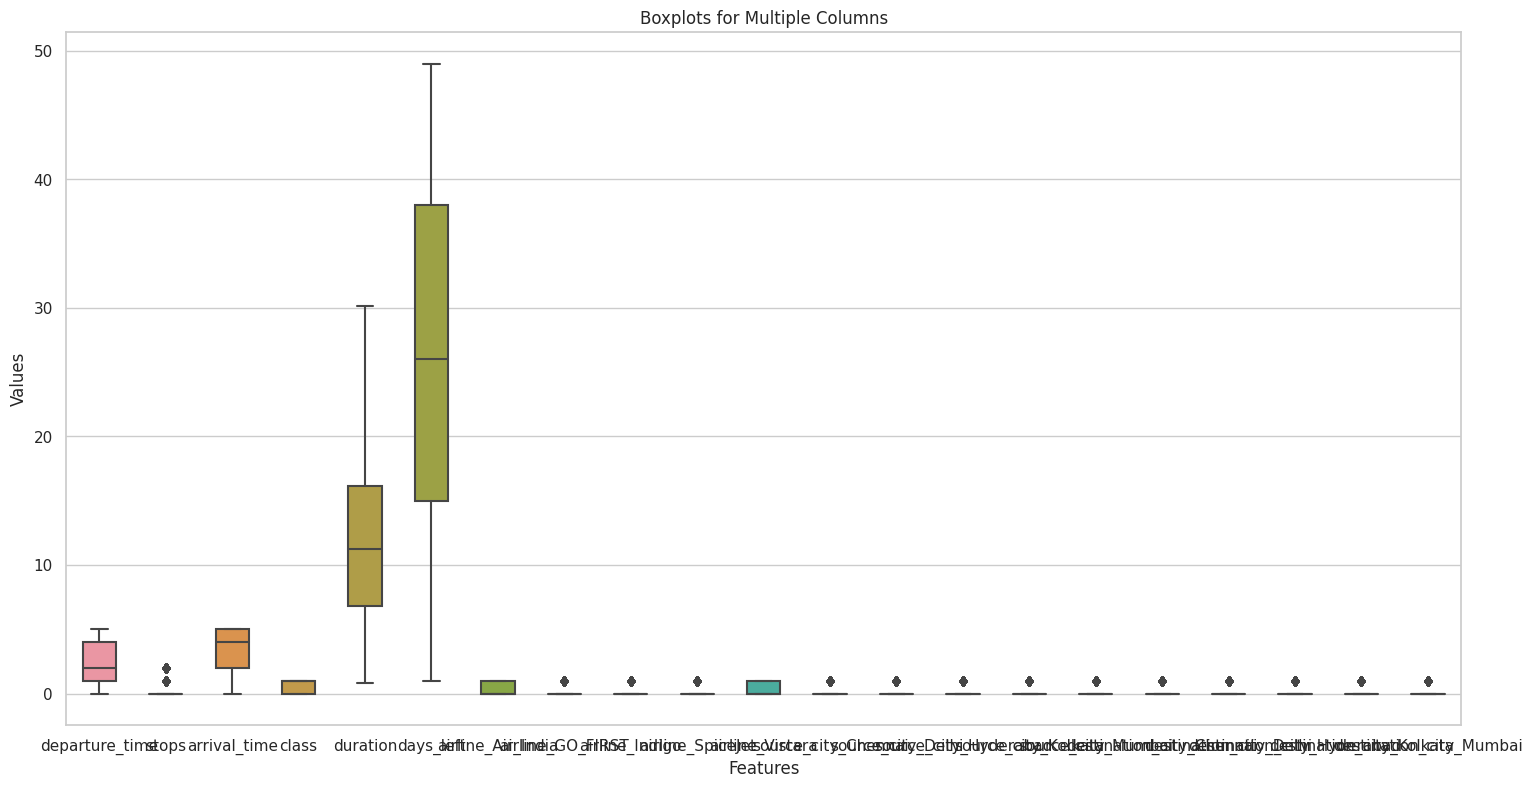

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with multiple columns
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the columns you want to create boxplots for
columns_to_plot = ['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai']

# Create boxplots for multiple columns
plt.figure(figsize=(18, 9))  # Adjust the size of the figure as needed
sns.boxplot(data=Flight_price[columns_to_plot], width=0.5)  # Adjust width as needed

# Set labels and title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplots for Multiple Columns")

# Show the plot
plt.show()


# Feature Engineering

In [39]:
Flight_price.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

In [40]:
X= Flight_price[['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai']]
Y=Flight_price['price']

In [41]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
Y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

# Scaling and feature selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Standardize the features for better performance of some feature selection methods
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SelectKBest class with the f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector to the scaled training data and transform the feature matrix
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform the test data using the same selector
X_test_selected = selector.transform(X_test_scaled)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Print or use the selected features
selected_features = X.columns[selected_features_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara'],
      dtype='object')


In [43]:
X= Flight_price[['departure_time', 'stops', 'class', 'duration', 'days_left',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara']]
Y=Flight_price['price']

In [44]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Random forest Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
Flight_reg=RandomForestRegressor()
Flight_reg.fit(X_train_scaled,y_train)
y_pred=Flight_reg.predict(X_test_scaled)
y_pred

array([ 7366.  , 64831.  ,  6195.  , ...,  6734.  ,  5082.  , 66455.38])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Flight_reg is your trained RandomForestRegressor

# Predict on the test set
y_pred = Flight_reg.predict(X_test_scaled)

# Evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.17265096366877505
Mean Squared Error: 4.184417435991275
R-squared: 0.9999999918746167


# Knn with 5 neighbour

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming Flight_price is your DataFrame
X = Flight_price[['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai']]
Y = Flight_price['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNeighborsRegressor with a specified number of neighbors (k)
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the value of n_neighbors

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the performance of the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model Performance:")
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)


KNN Model Performance:
Mean Absolute Error: 717.335753194183
Mean Squared Error: 2797422.113411404
R-squared: 0.9945679112632569
